[Reference](https://medium.com/analytics-vidhya/create-your-own-coefficient-plot-function-in-python-aadb9fe27a77)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
from datetime import datetime as date
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_context("paper")

data = pd.read_csv('https://raw.githubusercontent.com/Branden-Kang/Data-Visualization/master/Data/kc_house_data.csv') 
df = pd.DataFrame(data)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
df = df.drop(['waterfront','view','id'], axis=1)

In [4]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   condition      21597 non-null  int64  
 8   grade          21597 non-null  int64  
 9   sqft_above     21597 non-null  int64  
 10  sqft_basement  21597 non-null  object 
 11  yr_built       21597 non-null  int64  
 12  yr_renovated   17755 non-null  float64
 13  zipcode        21597 non-null  int64  
 14  lat            21597 non-null  float64
 15  long           21597 non-null  float64
 16  sqft_living15  21597 non-null  int64  
 17  sqft_lot15     21597 non-null  int64  
dtypes: flo

In [6]:
df.date[0]

'10/13/2014'

In [7]:
def datenum(datestr):
    '''
    Convert datestring in the format MM/DD/YYYY
    to MATLAB style datenum
    '''
    datenum = date.toordinal(date((int(datestr.split('/', -1)[2])),
                                  (int(datestr.split('/', -1)[0])),
                                  (int(datestr.split('/', -1)[1]))
                                 ))+366
    return datenum

# Apply to date column
df.date = df.date.map(datenum)

In [8]:
print(df.sqft_basement.unique()[:10])

['0.0' '400.0' '910.0' '1530.0' '?' '730.0' '1700.0' '300.0' '970.0'
 '760.0']


In [9]:
df.sqft_basement = df.sqft_basement.replace('?','0.0').astype(float)

In [10]:
df.isna().sum()

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [11]:
df.yr_renovated.sort_values(na_position='first').head()

2    NaN
12   NaN
23   NaN
26   NaN
28   NaN
Name: yr_renovated, dtype: float64

In [12]:
df.yr_renovated.describe()

count    17755.000000
mean        83.636778
std        399.946414
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2015.000000
Name: yr_renovated, dtype: float64

In [13]:
sum(df.yr_renovated > 0)

744

In [14]:
df.yr_renovated = df.yr_renovated.fillna(0)

In [15]:
df.describe().round()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21597.0,21597.0,21597.0,21597.0,21597.0,21597.0,21597.0,21597.0,21597.0,21597.0,21597.0,21597.0,21597.0,21597.0,21597.0,21597.0,21597.0,21597.0
mean,735901.0,540297.0,3.0,2.0,2080.0,15099.0,1.0,3.0,8.0,1789.0,286.0,1971.0,69.0,98078.0,48.0,-122.0,1987.0,12758.0
std,113.0,367368.0,1.0,1.0,918.0,41413.0,1.0,1.0,1.0,828.0,440.0,29.0,364.0,54.0,0.0,0.0,685.0,27274.0
min,735721.0,78000.0,1.0,0.0,370.0,520.0,1.0,1.0,3.0,370.0,0.0,1900.0,0.0,98001.0,47.0,-123.0,399.0,651.0
25%,735802.0,322000.0,3.0,2.0,1430.0,5040.0,1.0,3.0,7.0,1190.0,0.0,1951.0,0.0,98033.0,47.0,-122.0,1490.0,5100.0
50%,735888.0,450000.0,3.0,2.0,1910.0,7618.0,2.0,3.0,7.0,1560.0,0.0,1975.0,0.0,98065.0,48.0,-122.0,1840.0,7620.0
75%,736012.0,645000.0,4.0,2.0,2550.0,10685.0,2.0,4.0,8.0,2210.0,550.0,1997.0,0.0,98118.0,48.0,-122.0,2360.0,10083.0
max,736111.0,7700000.0,33.0,8.0,13540.0,1651359.0,4.0,5.0,13.0,9410.0,4820.0,2015.0,2015.0,98199.0,48.0,-121.0,6210.0,871200.0


In [16]:
df[df.bedrooms > 9]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
8748,735832,520000.0,11,3.00,3000,4960,2.0,3,7,2400,600.0,1918,1999.0,98106,47.5560,-122.363,1420,4960
13301,735825,1150000.0,10,5.25,4590,10920,1.0,3,9,2500,2090.0,2008,0.0,98004,47.5861,-122.113,2730,10400
15147,735901,650000.0,10,2.00,3610,11914,2.0,4,7,3010,600.0,1958,0.0,98006,47.5705,-122.175,2040,11914
15856,735775,640000.0,33,1.75,1620,6000,1.0,5,7,1040,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700
19239,735962,660000.0,10,3.00,2920,3745,2.0,4,7,1860,1060.0,1913,0.0,98105,47.6635,-122.320,1810,3745


In [17]:
to_drop = df[df.bedrooms == 33].index
df = df.drop(to_drop)

In [18]:
df.long = abs(df.long)

In [19]:
df.describe().round()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21596.0,21596.0,21596.0,21596.0,21596.0,21596.0,21596.0,21596.0,21596.0,21596.0,21596.0,21596.0,21596.0,21596.0,21596.0,21596.0,21596.0,21596.0
mean,735901.0,540292.0,3.0,2.0,2080.0,15100.0,1.0,3.0,8.0,1789.0,286.0,1971.0,69.0,98078.0,48.0,122.0,1987.0,12759.0
std,113.0,367376.0,1.0,1.0,918.0,41414.0,1.0,1.0,1.0,828.0,440.0,29.0,364.0,54.0,0.0,0.0,685.0,27275.0
min,735721.0,78000.0,1.0,0.0,370.0,520.0,1.0,1.0,3.0,370.0,0.0,1900.0,0.0,98001.0,47.0,121.0,399.0,651.0
25%,735802.0,322000.0,3.0,2.0,1430.0,5040.0,1.0,3.0,7.0,1190.0,0.0,1951.0,0.0,98033.0,47.0,122.0,1490.0,5100.0
50%,735888.0,450000.0,3.0,2.0,1910.0,7619.0,2.0,3.0,7.0,1560.0,0.0,1975.0,0.0,98065.0,48.0,122.0,1840.0,7620.0
75%,736012.0,645000.0,4.0,2.0,2550.0,10686.0,2.0,4.0,8.0,2210.0,550.0,1997.0,0.0,98118.0,48.0,122.0,2360.0,10083.0
max,736111.0,7700000.0,11.0,8.0,13540.0,1651359.0,4.0,5.0,13.0,9410.0,4820.0,2015.0,2015.0,98199.0,48.0,123.0,6210.0,871200.0


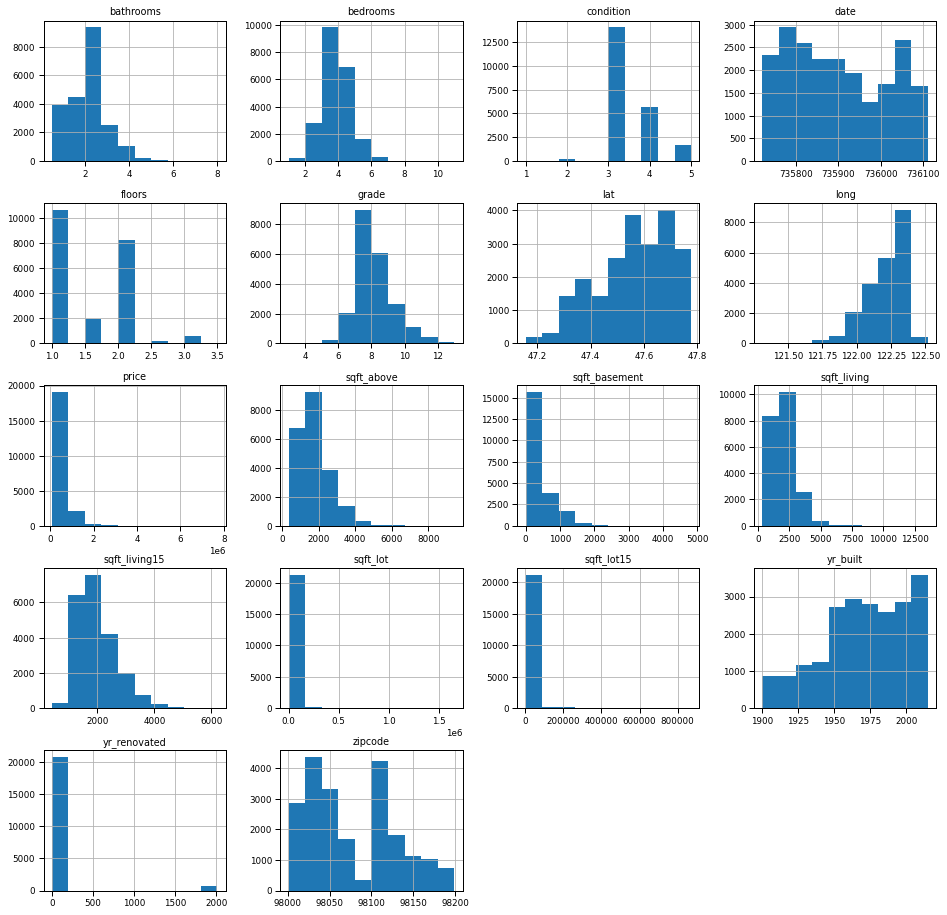

In [20]:
df.hist(figsize=(16,16));

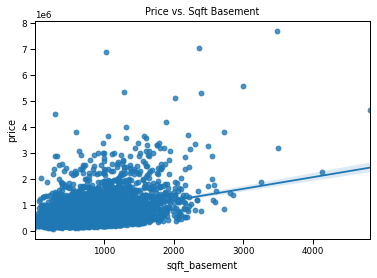

In [21]:
sns.regplot(df[df.sqft_basement > 0].sqft_basement,df[df.sqft_basement > 0].price)
plt.title('Price vs. Sqft Basement');

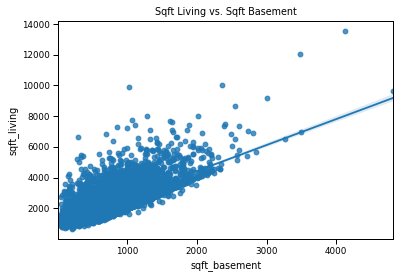

In [22]:
sns.regplot(df[df.sqft_basement > 0].sqft_basement,df[df.sqft_basement > 0].sqft_living)
plt.title('Sqft Living vs. Sqft Basement');

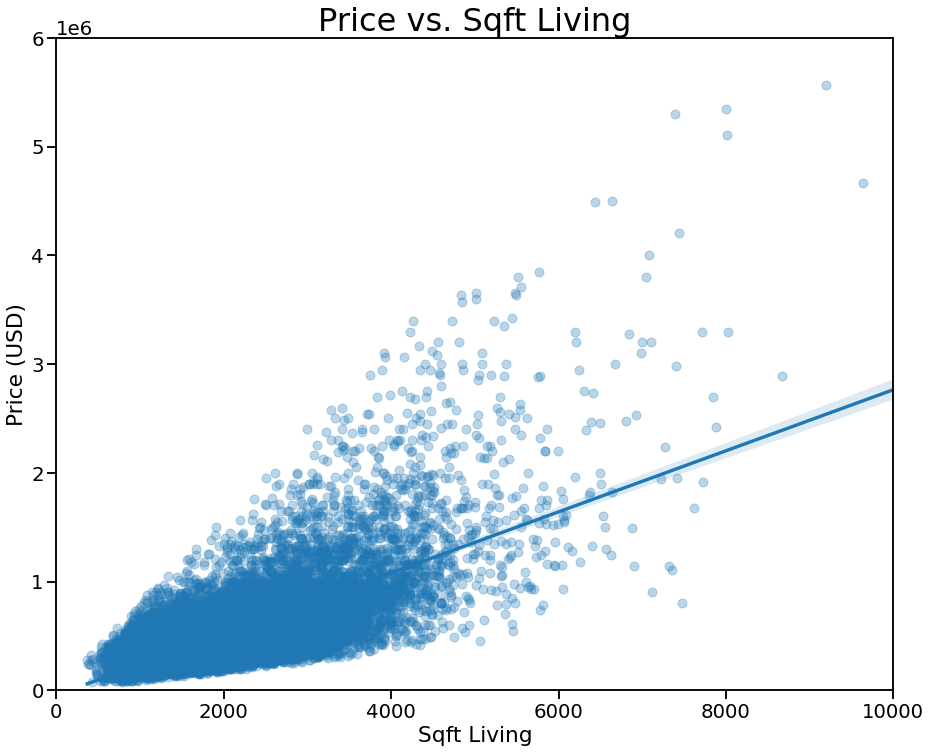

In [23]:
# Set style to 'talk' for outputting figure 
sns.set_context("talk", font_scale=1.2)

# Set figure size
plt.figure(figsize=(15,12))

# Plot
sns.regplot(df.sqft_living,df.price,scatter_kws={'alpha':0.3})

# Title & lables
plt.title('Price vs. Sqft Living',fontsize=32)
plt.xlabel('Sqft Living')
plt.ylabel('Price (USD)')

# Zoom in for scale
plt.xlim((0,10000))
plt.ylim((0,6000000))

# Output and save figure
plt.savefig('price_vs_sqft_living.png', bbox_inches='tight')

(0.0, 4000000.0)

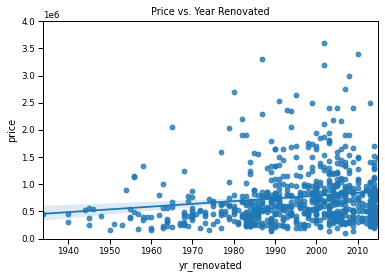

In [24]:
# Set style so output is 'paper' size
sns.set_context("paper")

# Plot
fig = sns.regplot(df.yr_renovated[df.yr_renovated > 0],df.price[df.yr_renovated > 0])
plt.title('Price vs. Year Renovated');

# Zoom in for scale
plt.ylim((0,4000000))

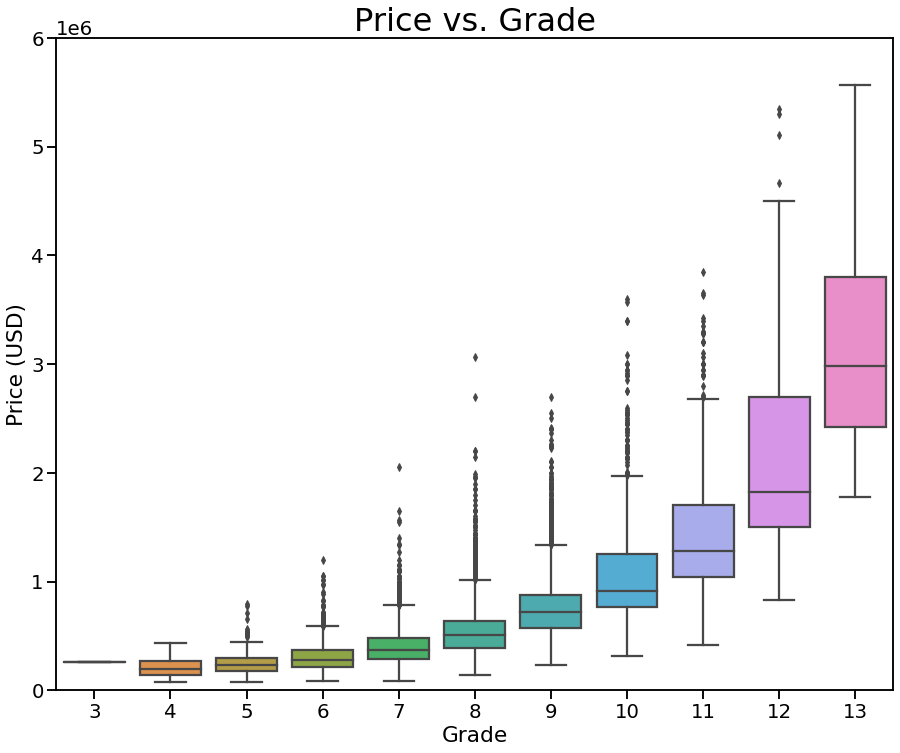

In [25]:
# Set style to 'talk' for outputting figure 
sns.set_context("talk", font_scale=1.2)

# Set figure size
plt.figure(figsize=(15,12))

# Plot data & add labels
fig = sns.boxplot(x='grade', y='price', data=df)
plt.title('Price vs. Grade',fontsize=32)
plt.xlabel('Grade')
plt.ylabel('Price (USD)');

# Set ymax to $6M for viewing. There are a few outliers up to around $8M.
fig.axis(ymin=0, ymax=6000000);

# Output and save figure
plt.savefig('price_vs_grade.png', bbox_inches='tight')

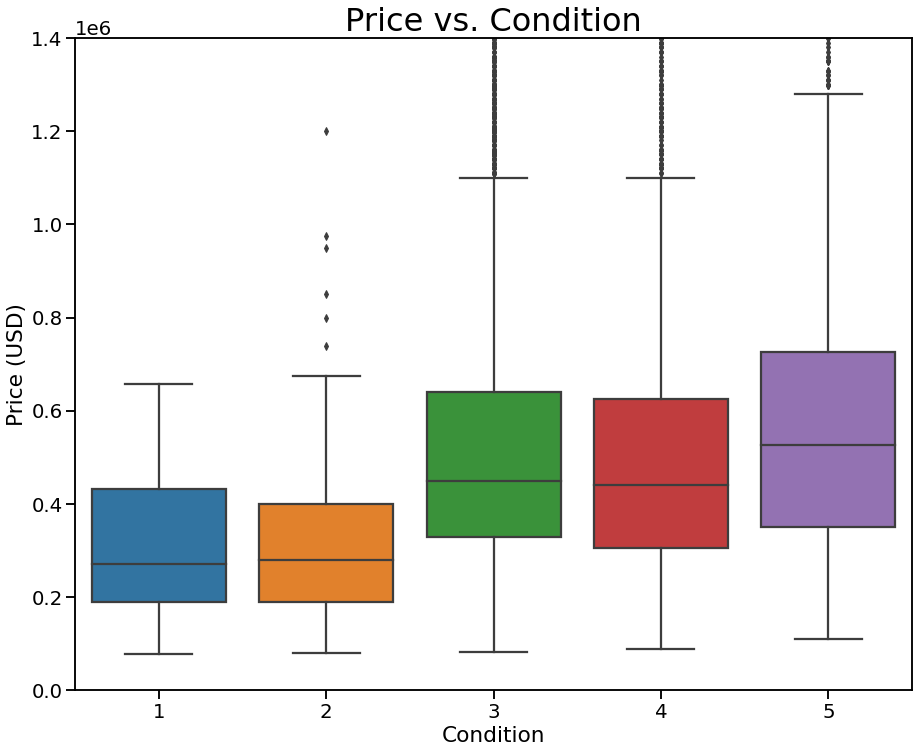

In [26]:
# Set figure size
plt.figure(figsize=(15,12))

# Plot data & add labels
fig = sns.boxplot(x='condition', y='price', data=df)
plt.title('Price vs. Condition',fontsize=32)
plt.xlabel('Condition')
plt.ylabel('Price (USD)');

# Set ymax to $1.4M for optimal viewing
fig.axis(ymin=0, ymax=1400000);

# Output and save figure
# plt.savefig('price_vs_condition.png', bbox_inches='tight')

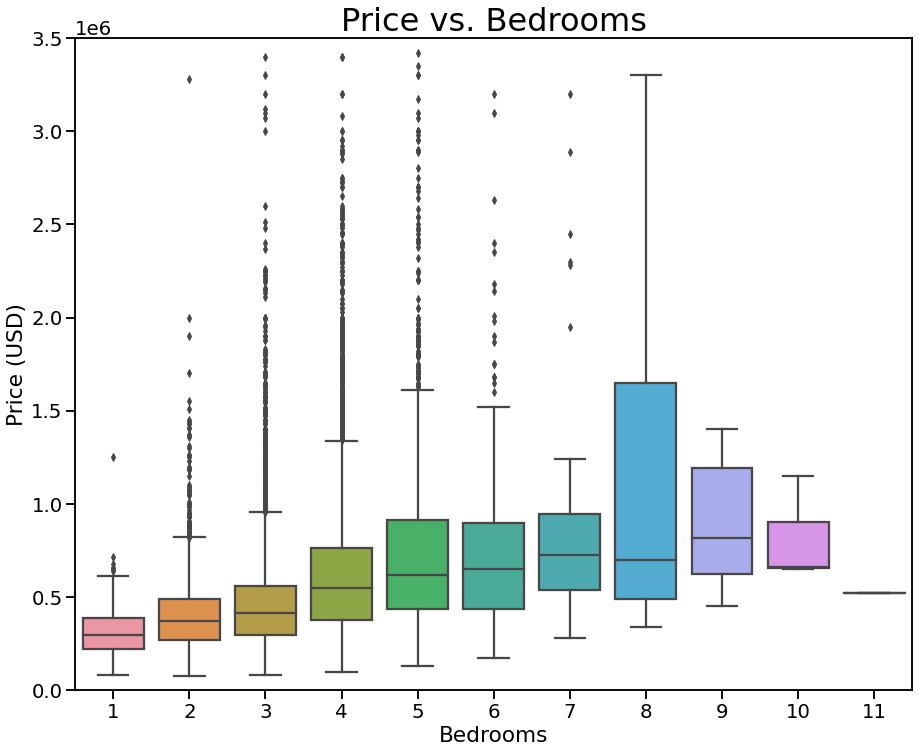

In [27]:
# Set figure size
plt.figure(figsize=(15,12))

# Plot data & add labels
fig = sns.boxplot(x='bedrooms', y='price', data=df)
plt.title('Price vs. Bedrooms',fontsize=32)
plt.xlabel('Bedrooms')
plt.ylabel('Price (USD)');

# Set ymax to $3.5M for optimal viewing
fig.axis(ymin=0, ymax=3500000);

# Output and save figure
# plt.savefig('price_vs_bedrooms.png', bbox_inches='tight')

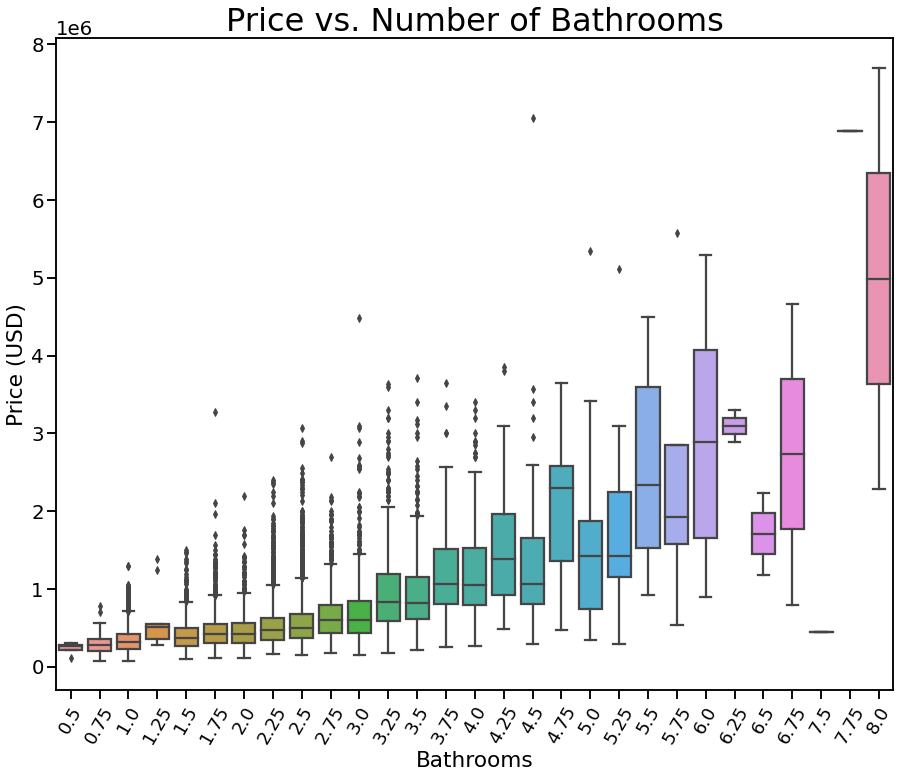

In [28]:
# Set figure size
plt.figure(figsize=(15,12))

# Plot data & add labels
fig = sns.boxplot(x='bathrooms', y='price', data=df)
plt.title('Price vs. Number of Bathrooms',fontsize=32)
plt.xlabel('Bathrooms')
plt.ylabel('Price (USD)')
plt.xticks(fontsize=18, rotation=60);

# Output and save figure
# plt.savefig('price_vs_bathrooms.png', bbox_inches='tight')

# Remove Extreme Outliers

In [29]:
# Define percentiles
percentiles = [0,1,99,100]

# Print them out
for i in percentiles:
    q = i/100
    print("{} percentile price: {}".format(q, df.price.quantile(q=q)))
    
# Percentiles for sqft_lot

# Print them out
for i in percentiles:
    q = i/100
    print("{} percentile sqft_lot: {}".format(q, df.sqft_lot.quantile(q=q)))

0.0 percentile price: 78000.0
0.01 percentile price: 154000.0
0.99 percentile price: 1970000.0
1.0 percentile price: 7700000.0
0.0 percentile sqft_lot: 520.0
0.01 percentile sqft_lot: 1013.9499999999999
0.99 percentile sqft_lot: 213008.0
1.0 percentile sqft_lot: 1651359.0


In [30]:
# Get original length to see percent removed
orig_tot = len(df)

# Subset to remove extreme outliers
# Price
df = df[(df.price >= 154000.0) & (df.price <= 1970000.0)] 
# Sqft lot
df = df[(df.sqft_lot >= 1013) & (df.sqft_lot <= 213008.0)]

# Calculate percent removed
print('Percent removed:', (orig_tot -len(df))/orig_tot)

Percent removed: 0.0394517503241341


# One-Hot Encode

In [31]:
bins = pd.qcut(df.sqft_basement[df.sqft_basement > 0],q=4)
bins.value_counts()

(9.999, 450.0]     2047
(450.0, 700.0]     2035
(960.0, 3260.0]    1983
(700.0, 960.0]     1914
Name: sqft_basement, dtype: int64

In [32]:
bins_sqft_basement = [0,10,450,980,5000]

# Define function to return dummies
def binned_dummies(data, features, bins):
    data_bins = pd.cut(data, bins)
    data_bins = data_bins.cat.as_unordered()
    dummies = pd.get_dummies(data_bins, prefix = features, drop_first=True)
    return dummies

dummies_sqft_basement = binned_dummies(df.sqft_basement,'sqft_basement', bins_sqft_basement)

# Remove original column from data set
df = df.drop(['sqft_basement'], axis=1)
                                            
# Add new columns in
df = pd.concat([df, dummies_sqft_basement], axis=1)

In [33]:
bins = pd.qcut(df.yr_renovated[df.yr_renovated > 0],q=4)
bins.value_counts()

(1987.0, 2000.0]      191
(1933.999, 1987.0]    181
(2008.0, 2015.0]      166
(2000.0, 2008.0]      166
Name: yr_renovated, dtype: int64

In [34]:
bins_yr_renovated = [0,1933,1987,2000,2008,2015]

dummies_yr_renovated = binned_dummies(df.yr_renovated,'yr_renovated', bins_yr_renovated)

# Remove original column from data set
df = df.drop(['yr_renovated'], axis=1)
                                            
# Add new columns in
df = pd.concat([df, dummies_yr_renovated], axis=1)

In [35]:
# Normalize & Scale Continuous Features

# Continuous features
features = ['date','price','sqft_living','lat','long','bedrooms',
            'bathrooms','floors','condition','grade','sqft_lot',
            'sqft_above','yr_built','sqft_living15','sqft_lot15',
            'zipcode']

df_cont_features = df[features]

### Log transform ###

df_log = np.log(df_cont_features)
#df_log.columns = log_names


### Normalize ###

# Define function to normalize
def normalize(feature):
    return (feature - feature.mean()) / feature.std()

# Apply function to normalize
df_log_norm = df_log.apply(normalize)

### Min-Max Scale ###

# Get everything on the same scale 0 to 1
# Define function to min-max scale
def minmaxscale(feature):
    return (feature-min(feature))/(max(feature)-min(feature))

# Apply function to min-max scale
df_log_norm_scale = df_log.apply(minmaxscale)

# Remove original column from data set
df = df.drop(features, axis=1)

# Add new columns in
df = pd.concat([df, df_log_norm_scale], axis=1)

In [36]:
df.describe()

,"sqft_basement_(10, 450]","sqft_basement_(450, 980]","sqft_basement_(980, 5000]","yr_renovated_(1933, 1987]","yr_renovated_(1987, 2000]","yr_renovated_(2000, 2008]","yr_renovated_(2008, 2015]",date,price,sqft_living,lat,long,bedrooms,bathrooms,floors,condition,grade,sqft_lot,sqft_above,yr_built,sqft_living15,sqft_lot15,zipcode
count,20744.000000,20744.000000,20744.000000,20744.000000,20744.000000,20744.000000,20744.000000,20744.000000,20744.000000,20744.000000,20744.000000,20744.000000,20744.000000,20744.000000,20744.000000,20744.000000,20744.000000,20744.000000,20744.000000,20744.000000,20744.000000,20744.000000,20744.000000
mean,0.098583,0.195093,0.090870,0.008725,0.009207,0.008002,0.008002,0.461714,0.430658,0.540877,0.652636,0.752115,0.492670,0.505328,0.265576,0.752999,0.630059,0.383175,0.493321,0.619934,0.579605,0.379278,0.388831
std,0.298108,0.396281,0.287431,0.093004,0.095515,0.089099,0.089099,0.289786,0.190319,0.134866,0.222794,0.116388,0.115894,0.142315,0.278817,0.111919,0.097762,0.150673,0.138282,0.253590,0.119765,0.114901,0.270016
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.207736,0.292965,0.449217,0.509076,0.678598,0.458157,0.462607,0.000000,0.682606,0.577833,0.301140,0.392396,0.450745,0.495064,0.316497,0.161753
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.428270,0.420700,0.544318,0.671223,0.764460,0.458157,0.555410,0.323657,0.682606,0.577833,0.376384,0.479897,0.650180,0.571440,0.377830,0.323453
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.746204,0.557968,0.635522,0.842594,0.846920,0.578130,0.594316,0.553295,0.861353,0.668898,0.436824,0.593028,0.838782,0.662900,0.420025,0.591153
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Check for Multicollinearity

In [37]:
abs(df[features].corr()) > 0.75

,date,price,sqft_living,lat,long,bedrooms,bathrooms,floors,condition,grade,sqft_lot,sqft_above,yr_built,sqft_living15,sqft_lot15,zipcode
date,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
price,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False
lat,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
long,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
grade,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False


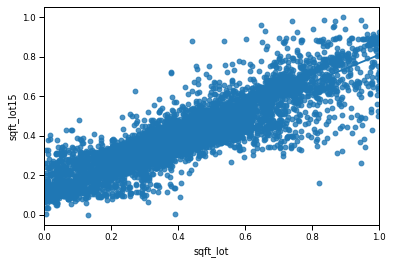

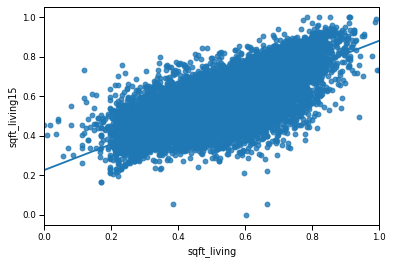

In [38]:
sns.set_context("paper")
sns.regplot(df.sqft_lot,df.sqft_lot15)
plt.show()
sns.regplot(df.sqft_living,df.sqft_living15)
plt.show()

# Building the model

In [39]:
# Features
X = df.drop(['price'],axis=1)
# Target
y = df.price

In [40]:
# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Split data with test size of 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [41]:
# Fit Model & Calculate Predictions

# Import Packages
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, make_scorer

# Initialize the linear regression model class
linreg = LinearRegression()

# Fit the model to train data
linreg.fit(X_train, y_train)

# Calculate predictions on test set
y_hat_test = linreg.predict(X_test)

# Calculate RMSE of test set
test_mse = mean_squared_error(y_test, y_hat_test)

# Assign coefficients & intercept
intercept=linreg.intercept_
coefficients=linreg.coef_

# Output y-int, coeffs & RMSE of the test set
print(f"y-int: {intercept}")
print(f"coeffs: {coefficients}")
print(f"MSE test: {test_mse}")

y-int: -0.6012094969593657
coeffs: [ 0.03110123  0.02879482  0.04999327 -0.01149676  0.0399013   0.05996032
  0.06103286  0.02887259  0.20733604  0.32171184  0.04132421 -0.12209539
  0.08792761  0.04866284  0.12806122  0.69558973  0.00550496  0.21251806
 -0.18307065  0.28321099 -0.06930898 -0.03227656]
MSE test: 0.009179166238309134


# Cross-validate Model

In [42]:
# Cross-validate & Output RMSE & R^2 

# Import Packages
from sklearn.model_selection import cross_val_score

# Cross-validate Model

# Test Errors
mse = make_scorer(mean_squared_error)
cv_5_results = cross_val_score(linreg, X, y, cv=5, scoring=mse)
print(f"Crossval MSE: {cv_5_results.mean()}")

# R-squared
from sklearn.model_selection import KFold
crossval = KFold(n_splits=10, shuffle=True, random_state=1)
baseline_R2 = np.mean(cross_val_score(linreg, X, y, scoring='r2', cv=crossval))
print(f"Baseline R^2: {baseline_R2}")

Crossval MSE: 0.009539857759726184
Baseline R^2: 0.7384174752070204


# OLS model

In [43]:
# Fit Model & Output Regression Results Summary

# Import Package
import statsmodels.api as sm
from statsmodels.api import add_constant

# Build Model
X = sm.add_constant(X)
model1 = sm.OLS(y,X)
results1 = model1.fit()

# MSE of the residuals
print(f"MSE: {results1.mse_resid}")

# Output Results
results1.summary()

MSE: 0.00944636844239309


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     2673.
Date:                Sun, 30 Aug 2020   Prob (F-statistic):               0.00
Time:                        03:45:07   Log-Likelihood:                 18933.
No. Observations:               20744   AIC:                        -3.782e+04
Df Residuals:                   20721   BIC:                        -3.764e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -0.6074      0.011    -56.628      0.000      -0.628      -0.586
sqft_basement_(10, 450]       0.0318      0.003     10.831      0.000       0.026       0.038
sqft_basement_(450, 980]      0.0302      0.004      7.694      0.000       0.023       0.038
sqft_basement_(980, 5000]     0.0553      0.005     10.269      0.000       0.045       0.066
yr_renovated_(1933, 1987]    -0.0133      0.007     -1.803      0.071      -0.028       0.001
yr_renovated_(1987, 2000]     0.0414      0.007      5.762      0.000       0.027       0.056
yr_renovated_(2000, 2008]     0.0592      0.008      7.667      0.000       0.044       0.074
yr_renovated_(2008, 2015]     0.0559      0.008      7.263      0.000       0.041       0.071
date                          0.0290      0.002     12.422      0.000       0.024       0.034
sqft_living                   0.2037      0.028      7.302      0.000       0.149       0.258
lat                           0.3226      0.003     97.999      0.000       0.316       0.329
long                          0.0449      0.008      5.657      0.000       0.029       0.060
bedrooms                     -0.1253      0.008    -15.938      0.000      -0.141      -0.110
bathrooms                     0.0851      0.009      9.868      0.000       0.068       0.102
floors                        0.0457      0.004     11.871      0.000       0.038       0.053
condition                     0.1311      0.007     19.450      0.000       0.118       0.144
grade                         0.6957      0.012     58.039      0.000       0.672       0.719
sqft_lot                      0.0089      0.011      0.777      0.437      -0.014       0.031
sqft_above                    0.2211      0.026      8.583      0.000       0.171       0.272
yr_built                     -0.1810      0.004    -43.865      0.000      -0.189      -0.173
sqft_living15                 0.2881      0.009     30.822      0.000       0.270       0.306
sqft_lot15                   -0.0790      0.015     -5.401      0.000      -0.108      -0.050
zipcode                      -0.0333      0.003    -10.352      0.000      -0.040      -0.027
==============================================================================
Omnibus:                      524.744   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              879.962
Skew:                           0.231   Prob(JB):                    8.29e-192
Kurtosis:                       3.897   Cond. No.                         131.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
# Drop high p-value variables
X = X.drop(['sqft_lot','yr_renovated_(1933, 1987]'], axis=1)

In [45]:
# Build Model 1

X = sm.add_constant(X)
model = sm.OLS(y,X)
results1b = model.fit()

# MSE of the residuals
print(f"MSE: {results1b.mse_resid}")

results1b.summary()

MSE: 0.009447218627740122


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     2940.
Date:                Sun, 30 Aug 2020   Prob (F-statistic):               0.00
Time:                        03:46:45   Log-Likelihood:                 18931.
No. Observations:               20744   AIC:                        -3.782e+04
Df Residuals:                   20723   BIC:                        -3.765e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -0.6084      0.011    -56.856      0.000      -0.629      -0.587
sqft_basement_(10, 450]       0.0317      0.003     10.814      0.000       0.026       0.037
sqft_basement_(450, 980]      0.0302      0.004      7.684      0.000       0.022       0.038
sqft_basement_(980, 5000]     0.0553      0.005     10.261      0.000       0.045       0.066
yr_renovated_(1987, 2000]     0.0418      0.007      5.824      0.000       0.028       0.056
yr_renovated_(2000, 2008]     0.0595      0.008      7.716      0.000       0.044       0.075
yr_renovated_(2008, 2015]     0.0562      0.008      7.302      0.000       0.041       0.071
date                          0.0291      0.002     12.435      0.000       0.024       0.034
sqft_living                   0.2044      0.028      7.326      0.000       0.150       0.259
lat                           0.3226      0.003     98.121      0.000       0.316       0.329
long                          0.0445      0.008      5.627      0.000       0.029       0.060
bedrooms                     -0.1248      0.008    -15.886      0.000      -0.140      -0.109
bathrooms                     0.0845      0.009      9.799      0.000       0.068       0.101
floors                        0.0449      0.004     11.848      0.000       0.037       0.052
condition                     0.1314      0.007     19.528      0.000       0.118       0.145
grade                         0.6959      0.012     58.074      0.000       0.672       0.719
sqft_above                    0.2216      0.026      8.620      0.000       0.171       0.272
yr_built                     -0.1802      0.004    -44.363      0.000      -0.188      -0.172
sqft_living15                 0.2881      0.009     30.835      0.000       0.270       0.306
sqft_lot15                   -0.0696      0.008     -9.200      0.000      -0.084      -0.055
zipcode                      -0.0333      0.003    -10.368      0.000      -0.040      -0.027
==============================================================================
Omnibus:                      522.619   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              873.909
Skew:                           0.231   Prob(JB):                    1.71e-190
Kurtosis:                       3.893   Cond. No.                         129.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
# Q-Q Plot

# Define function 
def qqplot(results):
    '''
    Takes in OLS Regression Results and outputs q-q plot 
    of the model residuals.
    '''
    sns.set_context("paper")
    fig = sm.graphics.qqplot(results.resid, dist=stats.norm, line='45', fit=True)
    plt.title('Q-Q Plot of the Residuals')
    return plt.show()

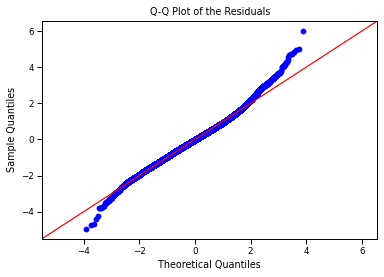

In [47]:
qqplot(results1b)

In [48]:
# Plot model residuals vs. fitted to test for heteroskedasticity

def heterosk(results):
    '''
    Takes in results from the fitted model and outputs a plot 
    of the residuals vs. the fitted values. 
    '''
    sns.set_context("paper")
    plt.scatter(results.fittedvalues, results.resid, alpha=0.5,s=5)
    plt.plot(results.fittedvalues, [0 for i in range(len(results.fittedvalues))])
    plt.ylabel('Residuals')
    plt.xlabel('Fitted')
    plt.title('Residuals vs. Fitted');
    return plt.show()

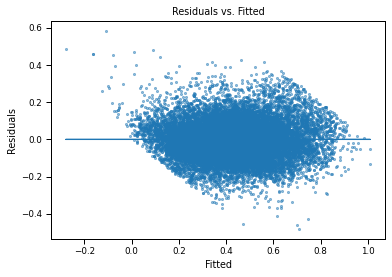

In [49]:
heterosk(results1b)

In [50]:
# Define function to output plot of the model coefficients

def coefplot(results):
    '''
    Takes in results of OLS model and returns a plot of 
    the coefficients with 95% confidence intervals.
    
    Removes intercept, so if uncentered will return error.
    '''
    # Create dataframe of results summary 
    coef_df = pd.DataFrame(results.summary().tables[1].data)
    
    # Add column names
    coef_df.columns = coef_df.iloc[0]

    # Drop the extra row with column labels
    coef_df=coef_df.drop(0)

    # Set index to variable names 
    coef_df = coef_df.set_index(coef_df.columns[0])

    # Change datatype from object to float
    coef_df = coef_df.astype(float)

    # Get errors; (coef - lower bound of conf interval)
    errors = coef_df['coef'] - coef_df['[0.025']
    
    # Append errors column to dataframe
    coef_df['errors'] = errors

    # Drop the constant for plotting
    coef_df = coef_df.drop(['const'])

    # Sort values by coef ascending
    coef_df = coef_df.sort_values(by=['coef'])

    ### Plot Coefficients ###

    # x-labels
    variables = list(coef_df.index.values)
    
    # Add variables column to dataframe
    coef_df['variables'] = variables
    
    # Set sns plot style back to 'poster'
    # This will make bars wide on plot
    sns.set_context("poster")

    # Define figure, axes, and plot
    fig, ax = plt.subplots(figsize=(15, 10))
    
    # Error bars for 95% confidence interval
    coef_df.plot(x='variables', y='coef', kind='bar',
                 ax=ax, color='none', fontsize=22, 
                 ecolor='steelblue',capsize=0,
                 yerr='errors', legend=False)
    
    # Set title & labels
    plt.title('Coefficients of Features w/ 95% Confidence Intervals',fontsize=30)
    ax.set_ylabel('Coefficients',fontsize=22)
    ax.set_xlabel('',fontsize=22)
    
    # Coefficients
    ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
               marker='o', s=80, 
               y=coef_df['coef'], color='steelblue')
    
    # Line to define zero on the y-axis
    ax.axhline(y=0, linestyle='--', color='red', linewidth=1)
    plt.savefig(f'Model_Coeffs{coef_df.coef.max()}.png', bbox_inches='tight');
    return plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:64: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead


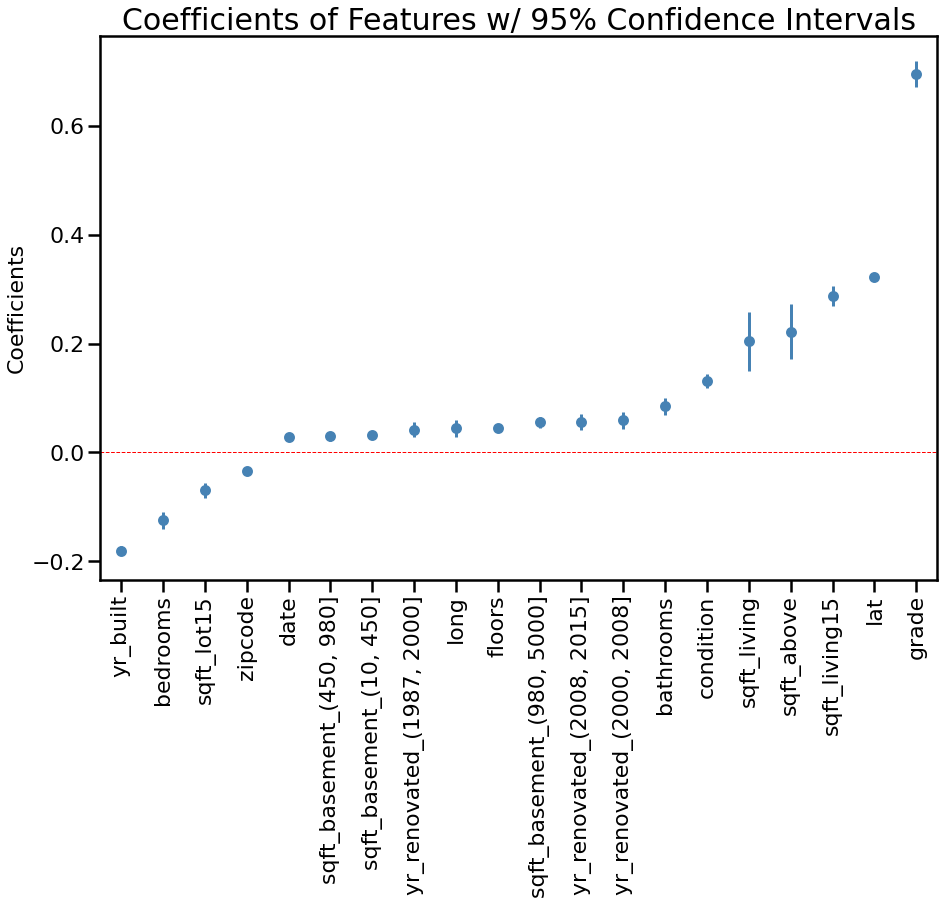

In [51]:
coefplot(results1b)

In [52]:
# Import package we'll be using
from itertools import combinations

# Find top interactions using R^2 value

# Use combinations from itertools to create all possible combinations of two features
feat_combinations = combinations(X_train.columns, 2)

# Initiate empty list to fill for interactons values
interactions = []

# for i, (feature1,feature2) in feature_combinations:
for i, (a, b) in enumerate(feat_combinations):
    
    # fill interatctions list with feature a * feature b
    X_train['interaction'] = X_train[a] * X_train[b]
    
    # Calculate R^2
    R2 = np.mean(cross_val_score(linreg, X_train, y_train, scoring='r2', cv=crossval))
    
    # See if it's higher than our R2 value we calculated above during crossvalidation 
    if R2 > baseline_R2:
        
        # If it is higher, append to our list
        interactions.append((a, b, round(R2,5)))

# Print out the top 5 interactions
print('Top 5 interactions: %s' %sorted(interactions, key=lambda inter: inter[2], reverse=True)[:5])

Top 5 interactions: [('sqft_living', 'grade', 0.74416), ('bathrooms', 'grade', 0.74349), ('sqft_living', 'bathrooms', 0.74253), ('sqft_living', 'sqft_above', 0.74217), ('long', 'zipcode', 0.74215)]


In [53]:
#Build a final model with interactions

final = X.copy()

final['sqft_living*grade'] = final['sqft_living'] * final['grade']

In [54]:
# Build Model 2

final = sm.add_constant(final)
model = sm.OLS(y,final)
results2 = model.fit()

# MSE of the residuals
print(f"MSE: {results2.mse_resid}")

results2.summary()

MSE: 0.009142999308638768


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     2926.
Date:                Sun, 30 Aug 2020   Prob (F-statistic):               0.00
Time:                        03:50:58   Log-Likelihood:                 19271.
No. Observations:               20744   AIC:                        -3.850e+04
Df Residuals:                   20722   BIC:                        -3.832e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -0.2303      0.018    -12.918      0.000      -0.265      -0.195
sqft_basement_(10, 450]       0.0306      0.003     10.596      0.000       0.025       0.036
sqft_basement_(450, 980]      0.0223      0.004      5.755      0.000       0.015       0.030
sqft_basement_(980, 5000]     0.0346      0.005      6.453      0.000       0.024       0.045
yr_renovated_(1987, 2000]     0.0469      0.007      6.636      0.000       0.033       0.061
yr_renovated_(2000, 2008]     0.0596      0.008      7.854      0.000       0.045       0.074
yr_renovated_(2008, 2015]     0.0591      0.008      7.804      0.000       0.044       0.074
date                          0.0289      0.002     12.556      0.000       0.024       0.033
sqft_living                  -0.3901      0.036    -10.970      0.000      -0.460      -0.320
lat                           0.3231      0.003     99.888      0.000       0.317       0.329
long                          0.0470      0.008      6.029      0.000       0.032       0.062
bedrooms                     -0.0969      0.008    -12.430      0.000      -0.112      -0.082
bathrooms                     0.0974      0.008     11.464      0.000       0.081       0.114
floors                        0.0433      0.004     11.614      0.000       0.036       0.051
condition                     0.1400      0.007     21.128      0.000       0.127       0.153
grade                         0.0564      0.027      2.085      0.037       0.003       0.109
sqft_above                    0.1227      0.026      4.797      0.000       0.073       0.173
yr_built                     -0.1711      0.004    -42.655      0.000      -0.179      -0.163
sqft_living15                 0.2604      0.009     28.147      0.000       0.242       0.279
sqft_lot15                   -0.0956      0.008    -12.740      0.000      -0.110      -0.081
zipcode                      -0.0365      0.003    -11.542      0.000      -0.043      -0.030
sqft_living*grade             1.1181      0.043     26.278      0.000       1.035       1.202
==============================================================================
Omnibus:                      438.709   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              706.630
Skew:                           0.206   Prob(JB):                    3.61e-154
Kurtosis:                       3.805   Cond. No.                         204.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

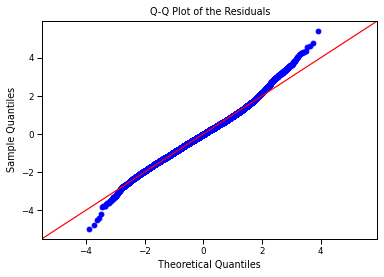

In [55]:
# Plot q-q for Model 2 residuals
qqplot(results2)

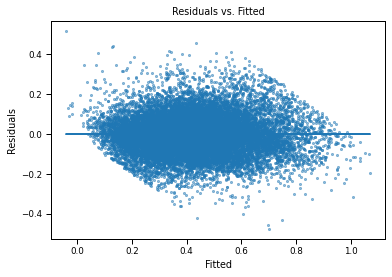

In [56]:
heterosk(results2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:64: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead


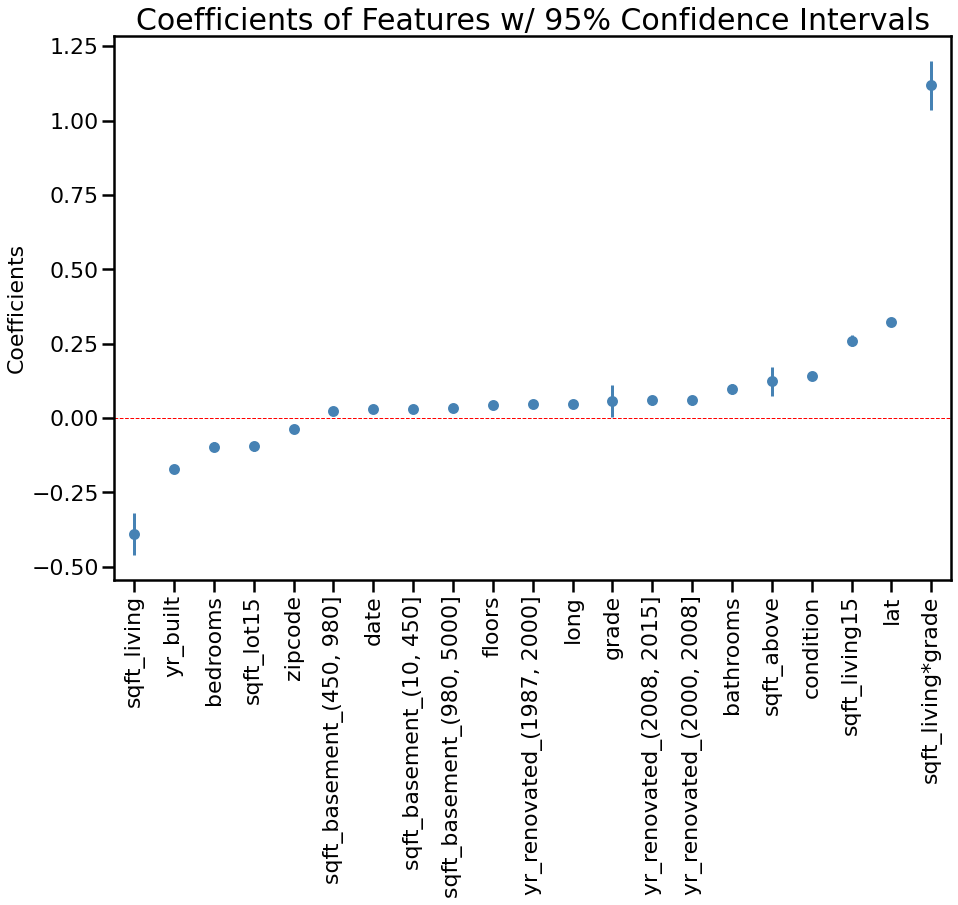

In [57]:
coefplot(results2)

In [58]:
final['bathrooms*grade'] = final['bathrooms'] * final['grade']
final['sqft_living*bathrooms'] = final['sqft_living'] * final['bathrooms']

In [59]:
# Build Model 3

final_const = sm.add_constant(final)
model = sm.OLS(y,final_const)
results3 = model.fit()

# MSE of the residuals
print(f"MSE: {results3.mse_resid}")

results3.summary()


MSE: 0.009122202217145903


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     2680.
Date:                Sun, 30 Aug 2020   Prob (F-statistic):               0.00
Time:                        03:51:32   Log-Likelihood:                 19295.
No. Observations:               20744   AIC:                        -3.854e+04
Df Residuals:                   20720   BIC:                        -3.835e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -0.2379      0.019    -12.712      0.000      -0.275      -0.201
sqft_basement_(10, 450]       0.0296      0.003     10.244      0.000       0.024       0.035
sqft_basement_(450, 980]      0.0190      0.004      4.884      0.000       0.011       0.027
sqft_basement_(980, 5000]     0.0284      0.005      5.214      0.000       0.018       0.039
yr_renovated_(1987, 2000]     0.0458      0.007      6.485      0.000       0.032       0.060
yr_renovated_(2000, 2008]     0.0582      0.008      7.674      0.000       0.043       0.073
yr_renovated_(2008, 2015]     0.0585      0.008      7.739      0.000       0.044       0.073
date                          0.0289      0.002     12.571      0.000       0.024       0.033
sqft_living                  -0.2248      0.055     -4.053      0.000      -0.333      -0.116
lat                           0.3223      0.003     99.675      0.000       0.316       0.329
long                          0.0462      0.008      5.937      0.000       0.031       0.061
bedrooms                     -0.0991      0.008    -12.716      0.000      -0.114      -0.084
bathrooms                    -0.1896      0.054     -3.544      0.000      -0.294      -0.085
floors                        0.0427      0.004     11.385      0.000       0.035       0.050
condition                     0.1420      0.007     21.433      0.000       0.129       0.155
grade                         0.1694      0.040      4.267      0.000       0.092       0.247
sqft_above                    0.0969      0.026      3.739      0.000       0.046       0.148
yr_built                     -0.1715      0.004    -42.776      0.000      -0.179      -0.164
sqft_living15                 0.2627      0.009     28.392      0.000       0.245       0.281
sqft_lot15                   -0.0948      0.007    -12.638      0.000      -0.109      -0.080
zipcode                      -0.0372      0.003    -11.763      0.000      -0.043      -0.031
sqft_living*grade             0.6787      0.083      8.184      0.000       0.516       0.841
bathrooms*grade               0.2506      0.093      2.708      0.007       0.069       0.432
sqft_living*bathrooms         0.2698      0.052      5.163      0.000       0.167       0.372
==============================================================================
Omnibus:                      433.432   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              702.566
Skew:                           0.202   Prob(JB):                    2.75e-153
Kurtosis:                       3.806   Cond. No.                         481.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the

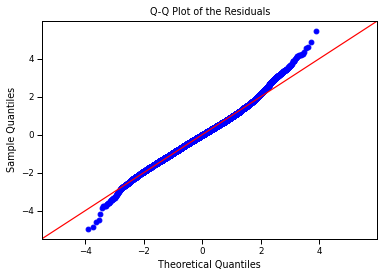

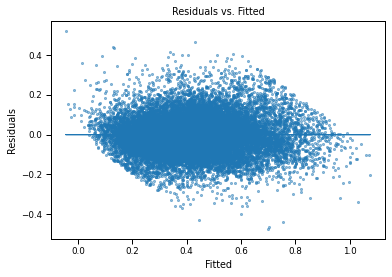

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:64: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead


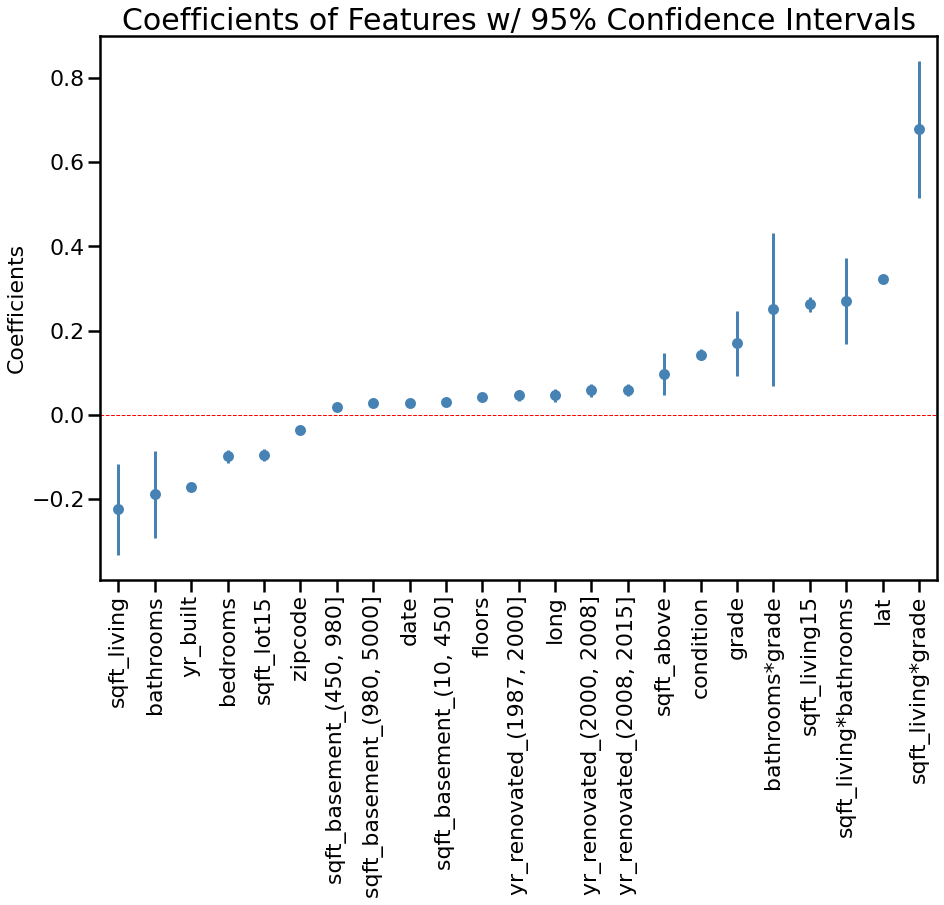

In [60]:
# Plot q-q for Model 3 residuals
qqplot(results3)

# Plot fitted vs. residuals for Model 3 residuals
heterosk(results3)

# Plot coefficients w/95% confidence intervals for Model 3
coefplot(results3)

In [60]:
final.head()

In [61]:
# Remove basement features
final = final.drop(['sqft_basement_(10, 450]','sqft_basement_(450, 980]','sqft_basement_(980, 5000]'],axis=1)

In [62]:
# Build Model 4

final_const = sm.add_constant(final)
model = sm.OLS(y,final_const)
results4 = model.fit()

# MSE of the residuals
print(f"MSE: {results4.mse_resid}")

results4.summary()

MSE: 0.009168336684949182


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     3061.
Date:                Sun, 30 Aug 2020   Prob (F-statistic):               0.00
Time:                        03:52:22   Log-Likelihood:                 19241.
No. Observations:               20744   AIC:                        -3.844e+04
Df Residuals:                   20723   BIC:                        -3.827e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -0.2361      0.019    -12.590      0.000      -0.273      -0.199
yr_renovated_(1987, 2000]     0.0460      0.007      6.500      0.000       0.032       0.060
yr_renovated_(2000, 2008]     0.0567      0.008      7.460      0.000       0.042       0.072
yr_renovated_(2008, 2015]     0.0567      0.008      7.488      0.000       0.042       0.072
date                          0.0292      0.002     12.698      0.000       0.025       0.034
sqft_living                  -0.0800      0.051     -1.577      0.115      -0.179       0.019
lat                           0.3230      0.003     99.684      0.000       0.317       0.329
long                          0.0509      0.008      6.539      0.000       0.036       0.066
bedrooms                     -0.1017      0.008    -13.023      0.000      -0.117      -0.086
bathrooms                    -0.2152      0.054     -4.021      0.000      -0.320      -0.110
floors                        0.0427      0.004     11.352      0.000       0.035       0.050
condition                     0.1379      0.007     20.821      0.000       0.125       0.151
grade                         0.1761      0.040      4.433      0.000       0.098       0.254
sqft_above                   -0.0352      0.012     -2.820      0.005      -0.060      -0.011
yr_built                     -0.1729      0.004    -43.108      0.000      -0.181      -0.165
sqft_living15                 0.2637      0.009     28.446      0.000       0.246       0.282
sqft_lot15                   -0.0997      0.008    -13.286      0.000      -0.114      -0.085
zipcode                      -0.0367      0.003    -11.577      0.000      -0.043      -0.030
sqft_living*grade             0.6473      0.083      7.805      0.000       0.485       0.810
bathrooms*grade               0.2930      0.092      3.176      0.001       0.112       0.474
sqft_living*bathrooms         0.2775      0.051      5.436      0.000       0.177       0.378
==============================================================================
Omnibus:                      420.624   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              664.509
Skew:                           0.204   Prob(JB):                    5.06e-145
Kurtosis:                       3.776   Cond. No.                         475.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
final = final.drop(['sqft_living'], axis=1)

In [64]:
# Build Model 4b

final_const = sm.add_constant(final)
model = sm.OLS(y,final_const)
results4b = model.fit()

# MSE of the residuals
print(f"MSE: {results4b.mse_resid}")

results4b.summary()

MSE: 0.009168994820416018


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     3222.
Date:                Sun, 30 Aug 2020   Prob (F-statistic):               0.00
Time:                        03:52:47   Log-Likelihood:                 19240.
No. Observations:               20744   AIC:                        -3.844e+04
Df Residuals:                   20724   BIC:                        -3.828e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -0.2407      0.019    -12.987      0.000      -0.277      -0.204
yr_renovated_(1987, 2000]     0.0459      0.007      6.482      0.000       0.032       0.060
yr_renovated_(2000, 2008]     0.0566      0.008      7.445      0.000       0.042       0.071
yr_renovated_(2008, 2015]     0.0567      0.008      7.488      0.000       0.042       0.072
date                          0.0293      0.002     12.699      0.000       0.025       0.034
lat                           0.3230      0.003     99.668      0.000       0.317       0.329
long                          0.0506      0.008      6.508      0.000       0.035       0.066
bedrooms                     -0.1037      0.008    -13.464      0.000      -0.119      -0.089
bathrooms                    -0.2817      0.033     -8.522      0.000      -0.346      -0.217
floors                        0.0426      0.004     11.314      0.000       0.035       0.050
condition                     0.1379      0.007     20.808      0.000       0.125       0.151
grade                         0.1769      0.040      4.452      0.000       0.099       0.255
sqft_above                   -0.0363      0.012     -2.913      0.004      -0.061      -0.012
yr_built                     -0.1731      0.004    -43.172      0.000      -0.181      -0.165
sqft_living15                 0.2641      0.009     28.499      0.000       0.246       0.282
sqft_lot15                   -0.0989      0.007    -13.210      0.000      -0.114      -0.084
zipcode                      -0.0367      0.003    -11.581      0.000      -0.043      -0.031
sqft_living*grade             0.5360      0.044     12.310      0.000       0.451       0.621
bathrooms*grade               0.4124      0.053      7.830      0.000       0.309       0.516
sqft_living*bathrooms         0.2629      0.050      5.236      0.000       0.164       0.361
==============================================================================
Omnibus:                      416.496   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              657.489
Skew:                           0.203   Prob(JB):                    1.69e-143
Kurtosis:                       3.772   Cond. No.                         269.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

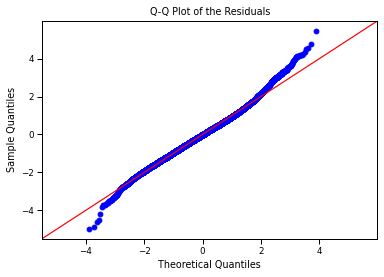

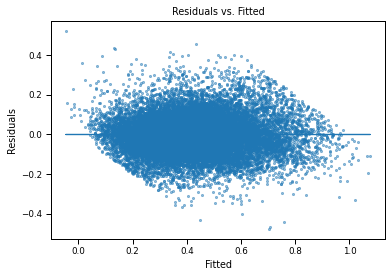

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:64: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead


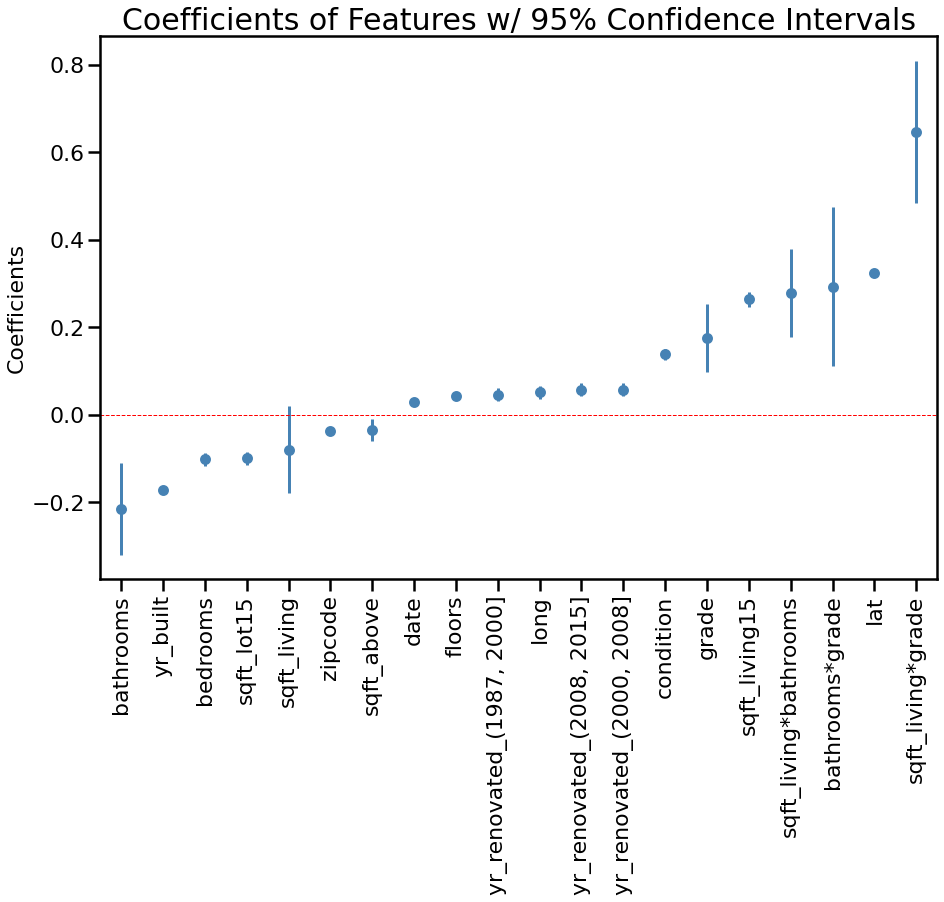

In [65]:
# Plot q-q for Model 4 residuals
qqplot(results4)

# Plot fitted vs. residuals for Model 4 residuals
heterosk(results4)

# Plot coefficients w/95% confidence intervals for Model 4
coefplot(results4)
